In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv('sbdb_query_results.csv')

In [3]:
df.head()

,spkid,neo,pha,spec_B,spec_T,class,data_arc
0,2000001,N,N,C,G,MBA,9520.0
1,2000002,N,N,B,B,MBA,79663.0
2,2000003,N,N,Sk,S,MBA,79720.0
3,2000004,N,N,V,V,MBA,25743.0
4,2000005,N,N,S,S,MBA,64671.0


* spkid = primary ID
* NEO = near earth orbit flag (y/n)
* PHA = potential hazerdous asteroid (y/n)
* spec_B = spectral taxonomic typer SMASSII
* spec_T = spectral taxonomic type (Tholen)
* class = orbit classification 
* data_arc = number of days spanned by the data arc

In [4]:
df.spkid.max()

54349051

In [5]:
df.neo.value_counts()

N    1242061
Y      31474
Name: neo, dtype: int64

In [6]:
for column in df:
    print(df[column].value_counts())


2000001     1
54167255    1
3664131     1
3664130     1
3664127     1
           ..
2424513     1
2424512     1
2424511     1
2424510     1
3013075     1
Name: spkid, Length: 1273538, dtype: int64
N    1242061
Y      31474
Name: neo, dtype: int64
N    1264587
Y       2321
Name: pha, dtype: int64
S        445
C        152
Ch       139
X        138
Sq       114
Xc        67
B         66
Sl        56
V         48
Xk        48
L         41
Sa        38
Cb        37
K         37
Xe        30
Sk        29
Sr        27
Q         20
T         19
A         17
S:        16
Ld        15
Cgh       15
D         13
Cg         9
O          7
X:         6
R          5
U          4
C:         3
Sq:        2
S(IV)      1
K:         1
V:         1
Name: spec_B, dtype: int64
S       338
C       140
X        52
M        38
D        35
       ... 
STGD      1
DX:       1
CP:       1
SD        1
Z         1
Name: spec_T, Length: 131, dtype: int64
MBA    1133733
OMB      39185
IMB      27333
MCA      24154
AP

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273538 entries, 0 to 1273537
Data columns (total 7 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   spkid     1273538 non-null  int64  
 1   neo       1273535 non-null  object 
 2   pha       1266908 non-null  object 
 3   spec_B    1666 non-null     object 
 4   spec_T    980 non-null      object 
 5   class     1273538 non-null  object 
 6   data_arc  1270850 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 68.0+ MB


<AxesSubplot:>

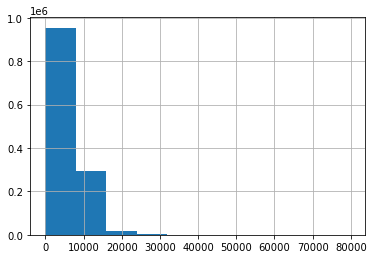

In [8]:
df.data_arc.hist()

In [9]:
df.pha.value_counts()

N    1264587
Y       2321
Name: pha, dtype: int64

<AxesSubplot:>

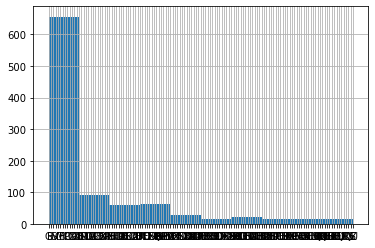

In [10]:
df.spec_T.hist()

In [11]:
df.spec_T.value_counts()

S       338
C       140
X        52
M        38
D        35
       ... 
STGD      1
DX:       1
CP:       1
SD        1
Z         1
Name: spec_T, Length: 131, dtype: int64

In [12]:
spec_T_large = ((df.spec_T.value_counts() > 10) == True)

In [13]:
df.spec_T

0            G
1            B
2            S
3            V
4            S
          ... 
1273533    NaN
1273534    NaN
1273535    NaN
1273536    NaN
1273537    NaN
Name: spec_T, Length: 1273538, dtype: object

In [19]:
df.rename(columns = {'class':'type'}, inplace = True)

<AxesSubplot:>

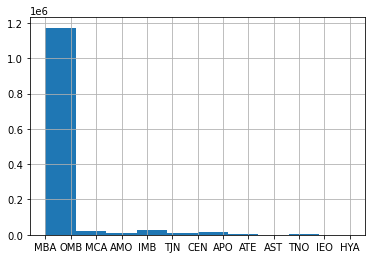

In [20]:
df.type.hist()

In [21]:
df.type.value_counts()

MBA    1133733
OMB      39185
IMB      27333
MCA      24154
APO      17691
TJN      12488
AMO      11288
TNO       4352
ATE       2466
CEN        689
AST        127
IEO         29
HYA          3
Name: type, dtype: int64

<AxesSubplot:>

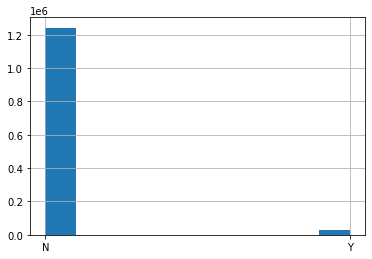

In [22]:
df.neo.hist()

In [24]:
df['neo_no'] = df.neo[df.neo == 'N']

In [25]:
df.neo_no.value_counts()

N    1242061
Name: neo_no, dtype: int64

array([[<AxesSubplot:title={'center':'AMO'}>,
        <AxesSubplot:title={'center':'APO'}>,
        <AxesSubplot:title={'center':'AST'}>,
        <AxesSubplot:title={'center':'ATE'}>],
       [<AxesSubplot:title={'center':'CEN'}>,
        <AxesSubplot:title={'center':'HYA'}>,
        <AxesSubplot:title={'center':'IEO'}>,
        <AxesSubplot:title={'center':'IMB'}>],
       [<AxesSubplot:title={'center':'MBA'}>,
        <AxesSubplot:title={'center':'MCA'}>,
        <AxesSubplot:title={'center':'OMB'}>,
        <AxesSubplot:title={'center':'TJN'}>],
       [<AxesSubplot:title={'center':'TNO'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

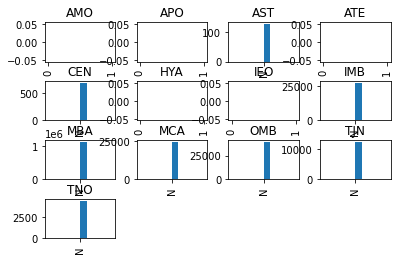

In [27]:
df.neo_no.hist(by=df.type)

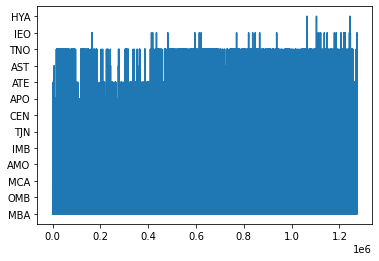

In [30]:
plt.plot(df.type)